In [44]:
import pandas as pd
import numpy as np

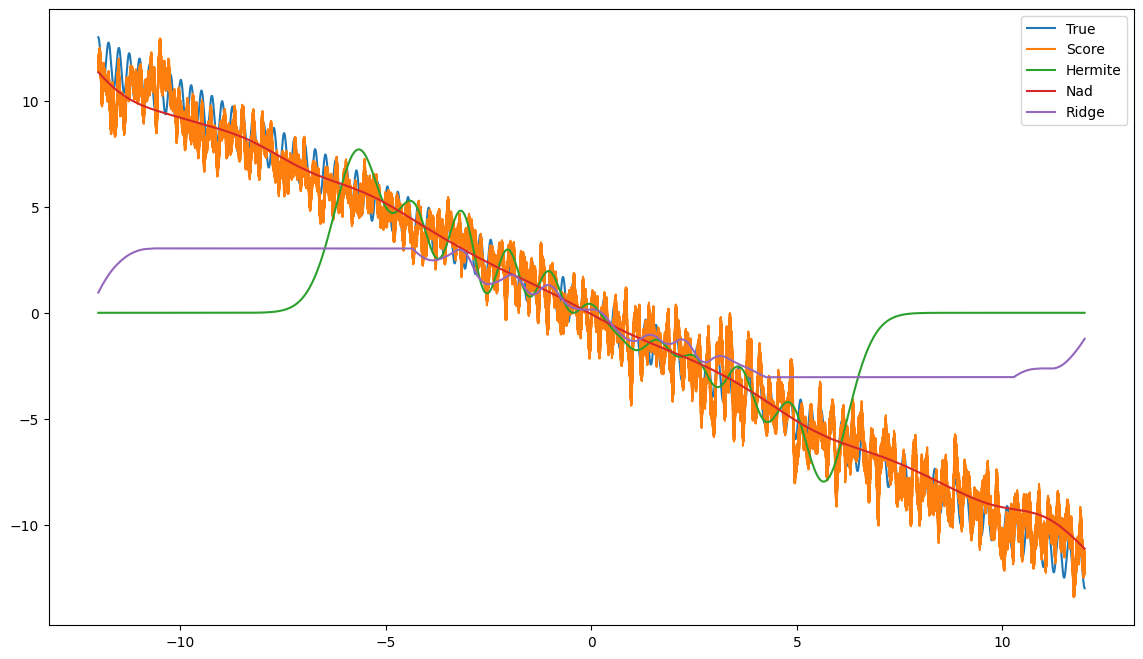

In [45]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("QuadSinHF_NewLongerDriftEvalExp_MSEs_10240NPaths_Diff100").replace(
            ".", "")
save_path = root_dir + extra_path
uniform_true_drifts = np.load(save_path + "_true_uniform.npy", allow_pickle=True)
all_score_drift_ests_uniform = np.load(save_path + "_score_uniform.npy", allow_pickle=True)
all_nad_drift_ests_uniform=np.load(save_path + "_nad_uniform.npy", allow_pickle=True)
all_hermite_drift_ests_uniform=np.load(save_path + "_hermite_uniform.npy", allow_pickle=True)
all_ridge_drift_ests_uniform=np.load(save_path + "_ridge_uniform.npy", allow_pickle=True)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,8))
Xs = np.linspace(-12, 12, uniform_true_drifts.flatten().shape[0])
plt.plot(Xs, uniform_true_drifts, label="True")
plt.plot(Xs, all_score_drift_ests_uniform, label="Score")
plt.plot(Xs, all_hermite_drift_ests_uniform, label="Hermite")
plt.plot(Xs, all_nad_drift_ests_uniform, label="Nad")
plt.plot(Xs, all_ridge_drift_ests_uniform, label="Ridge")
plt.legend()
plt.show()
plt.close()

In [46]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("QuadSinHF_NewLongerDriftEvalExp_MSEs_10240NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
hermite_eval=pd.read_parquet(root_dir + extra_path+ "_hermite_MSE.parquet")
ridge_eval=pd.read_parquet(root_dir + extra_path+ "_ridge_MSE.parquet")

nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
hermite_eval_true_law=pd.read_parquet(root_dir + extra_path+"_hermite_true_law_MSE.parquet")
ridge_eval_true_law=pd.read_parquet(root_dir + extra_path+"_ridge_true_law_MSE.parquet")

score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
hermite_state_eval=pd.read_parquet(root_dir + extra_path+ "_hermite_state_MSE.parquet")
ridge_state_eval=pd.read_parquet(root_dir + extra_path+ "_ridge_state_MSE.parquet")


nad_unif =pd.read_parquet(root_dir + extra_path+ "_nad_uniform_MSE.parquet", engine="fastparquet")
score_unif =pd.read_parquet(root_dir + extra_path+ "_score_uniform_MSE.parquet", engine="fastparquet")
ridge_unif =pd.read_parquet(root_dir + extra_path+ "_ridge_uniform_MSE.parquet", engine="fastparquet")
hermite_unif =pd.read_parquet(root_dir + extra_path+ "_hermite_uniform_MSE.parquet", engine="fastparquet")


quadsin_state_eval = (pd.concat([score_state_eval.rename({d:d+"Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Nadaraya State" for d in nad_state_eval.columns}, axis=1), ridge_state_eval.rename({d:d+"Ridge State" for d in nad_state_eval.columns}, axis=1), hermite_state_eval.rename({d:d+"Hermite State" for d in nad_state_eval.columns}, axis=1)], axis=1))

quadsin_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Score True" for d in score_eval_true_law.columns}, axis=1),nad_eval_true_law.rename({d:d+"Nadaraya True" for d in nad_eval_true_law.columns}, axis=1), ridge_eval_true_law.rename({d:d+"Ridge True" for d in ridge_eval_true_law.columns}, axis=1), hermite_eval_true_law.rename({d:d+"Hermite True" for d in hermite_eval_true_law.columns}, axis=1)], axis=1))

quadsin_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Score" for d in score_eval.columns}, axis=1),nad_eval.rename({d:d+"Nadaraya" for d in nad_eval.columns}, axis=1), ridge_eval.rename({d:d+"Ridge" for d in ridge_eval.columns}, axis=1), hermite_eval.rename({d:d+"Hermite" for d in hermite_eval.columns}, axis=1)], axis=1))

quadsin_uniform = (pd.concat([score_unif.rename({d:d+"Score" for d in score_unif.columns}, axis=1),nad_unif.rename({d:d+"Nadaraya" for d in nad_unif.columns}, axis=1),ridge_unif.rename({d:d+"Ridge" for d in ridge_unif.columns}, axis=1),hermite_unif.rename({d:d+"Hermite" for d in hermite_unif.columns}, axis=1)], axis=1))
quadsin_uniform.columns = quadsin_uniform.columns.map(lambda x: x.replace("mse", ""))

In [47]:
time_ax = np.linspace(1/256, 1/256*(quadsin_alt_law_eval.shape[0]),quadsin_alt_law_eval.shape[0])

In [48]:
true_law_eval =  quadsin_true_law_eval.sort_index(axis=1).set_index(time_ax)

In [49]:
alt_law_eval =  quadsin_alt_law_eval.sort_index(axis=1).set_index(time_ax)

In [50]:
state_eval =  quadsin_state_eval.iloc[1:, :].sort_index(axis=1).set_index(time_ax)**2

In [51]:
uniform = quadsin_uniform

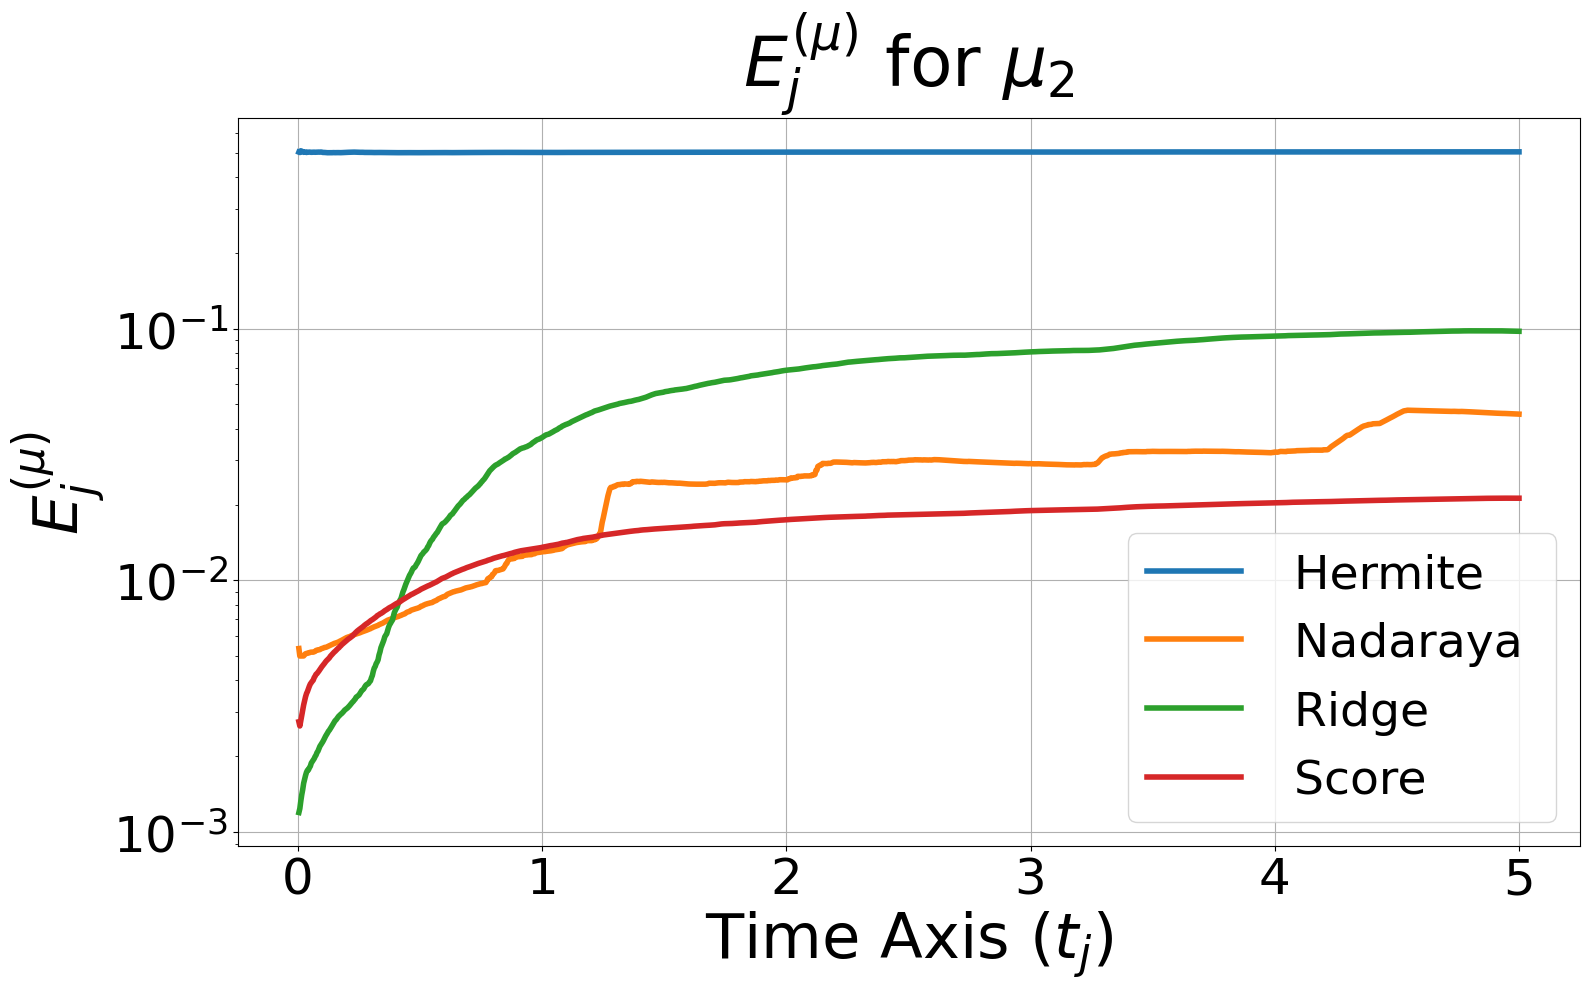

In [52]:
import matplotlib.pyplot as plt
for k in range(0, true_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = true_law_eval.iloc[:, k:k+4]
    currevals=currevals.rename({d:d.replace("True", "").replace("Nadaraya", " Nadaraya").replace("Ridge", " Ridge").replace("Hermite", " Hermite").replace("Score", " Score") for d in currevals.columns}, axis=1)
    label = currevals.columns[0].split(" Hermite")[0]
    if label in "BiPot":
        titlab = "$\mu_3$"
    elif label in "QuadSinHF":
        titlab = "$\mu_2$"
    else:
        titlab = "$\mu_1$"
    currevals = currevals.rename({d: d.split(f"{label}")[-1]for d in currevals.columns}, axis=1)
    currevals.plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    plt.title(rf"$E^{{(\mu)}}_j$ for {titlab}", fontsize=50)
    plt.ylabel(rf"$E^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.yscale("log")
    plt.tight_layout()
    #plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/FullData/{label}TrueLawOOSFullData.png")
    plt.show()
    plt.close()

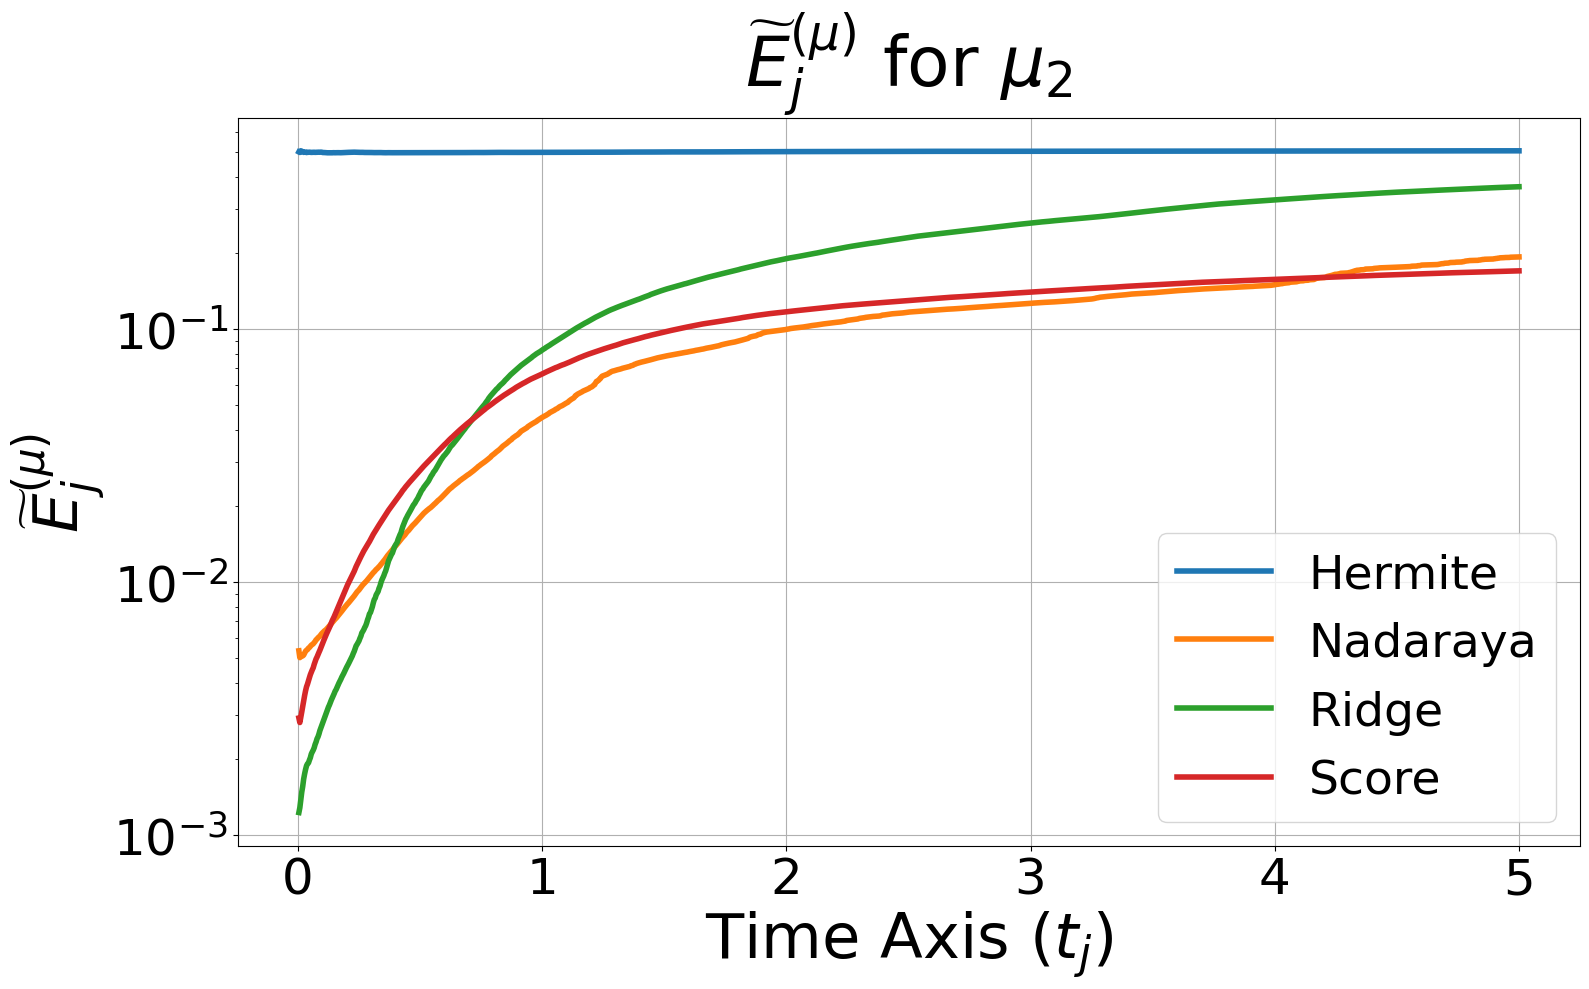

In [53]:
import matplotlib.pyplot as plt
for k in range(0, alt_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = alt_law_eval.iloc[:, k:k+4]
    currevals=currevals.rename({d:d.replace("True", "").replace("Nadaraya", " Nadaraya").replace("Ridge", " Ridge").replace("Hermite", " Hermite").replace("Score", " Score") for d in currevals.columns}, axis=1)
    label = currevals.columns[0].split(" Hermite")[0]
    if label == "BiPot":
        titlab = "$\mu_3$"
    elif label == "QuadSinHF":
        titlab = "$\mu_2$"
    else:
        titlab = "$\mu_1$"
    currevals = currevals.rename({d: d.split(f" ")[-1]for d in currevals.columns}, axis=1)
    currevals.plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    plt.title(rf"$\widetilde{{E}}^{{(\mu)}}_j$ for {titlab}", fontsize=50)
    plt.ylabel(rf"$\widetilde{{E}}^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.yscale("log")
    plt.tight_layout()
    #plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/FullData/{label}AltLawOOSFullData.png")
    plt.show()
    plt.close()

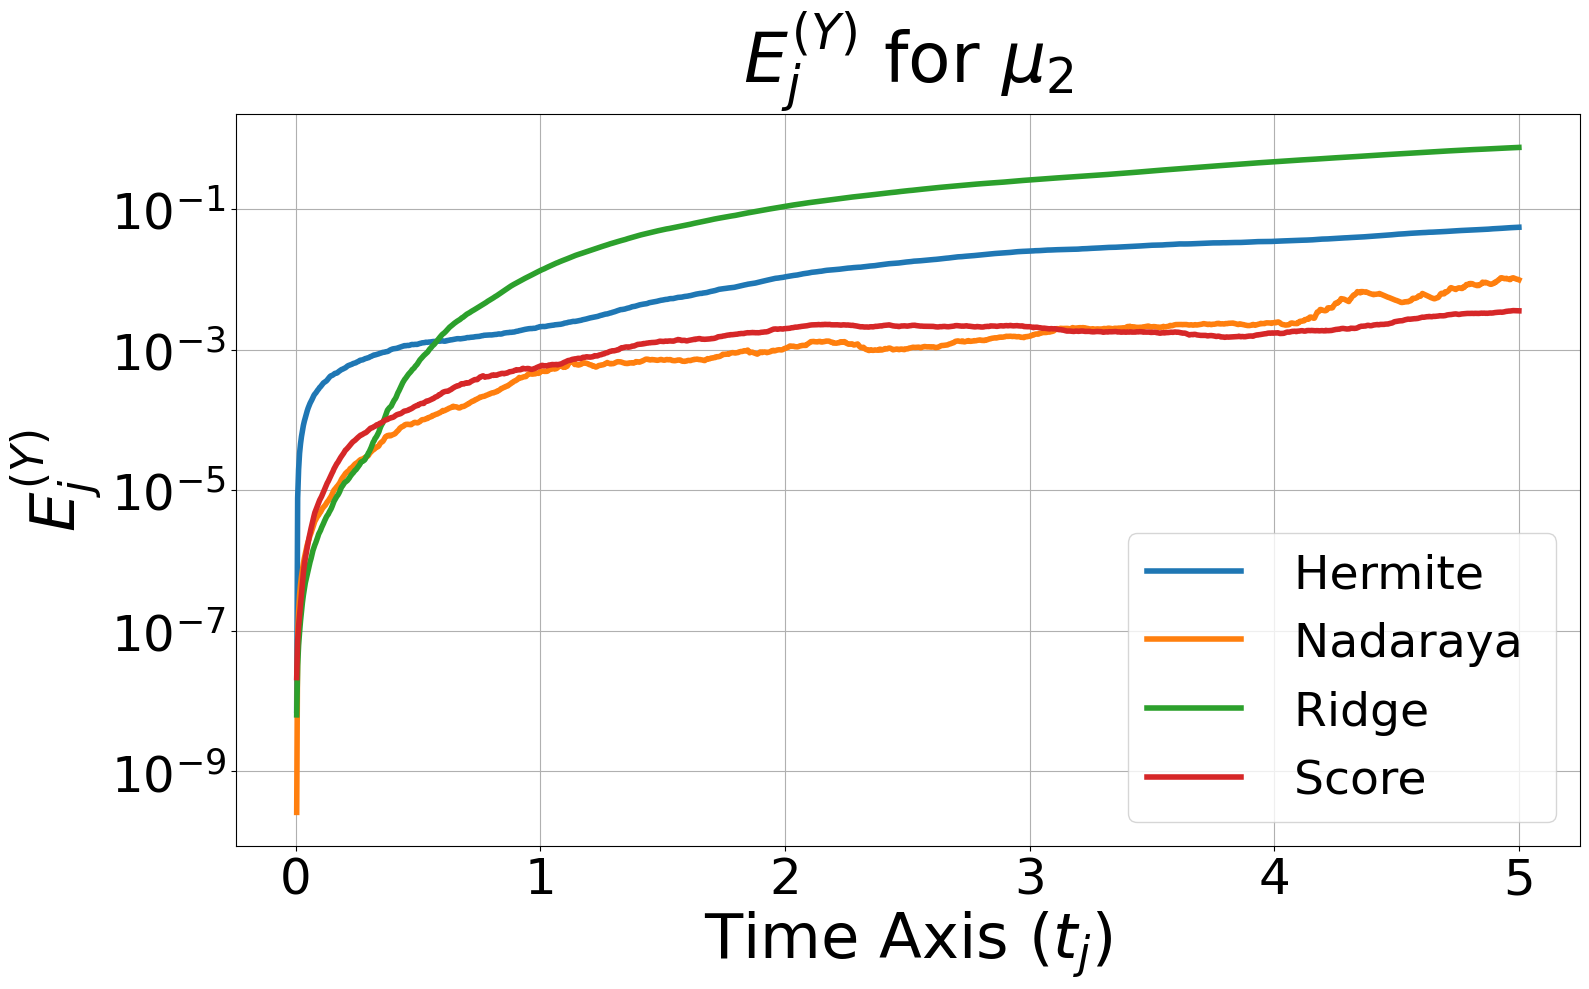

In [54]:
import matplotlib.pyplot as plt
for k in range(0, state_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = state_eval.iloc[:, k:k+4]
    currevals=currevals.rename({d:d.replace("State", "").replace("Nadaraya", " Nadaraya").replace("Score", " Score").replace("Hermite", " Hermite").replace("Ridge", " Ridge") for d in currevals.columns}, axis=1)
    label = currevals.columns[0].split(" Hermite")[0]
    if label == "BiPot":
        titlab = "$\mu_3$"
    elif label == "QuadSinHF":
        titlab = "$\mu_2$"
    else:
        titlab = "$\mu_1$"
    currevals = currevals.rename({d: d.split(f"{label}")[-1]for d in currevals.columns}, axis=1)
    currevals.plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    plt.title(rf"$E^{{(Y)}}_j$ for {titlab}", fontsize=50)
    plt.ylabel(rf"$E^{{(Y)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.yscale("log")
    plt.tight_layout()
    ##plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/FullData/{label}StateErrorOOSFullData.png")
    plt.show()
    plt.close()

In [55]:
valsign = {"SinLog":1, "QuadSinHF":2, "BiPot":3}
def mapping(y):
    if "Nadaraya" in y:
        return "Nadaraya"
    elif "Score" in y:
        return "Score"
    elif "Hermite" in y:
        return "Hermite"
    return "Ridge"

In [56]:
s=true_law_eval.iloc[[-1],:].T.assign(M =lambda x: x.index.map(lambda y: y.replace("Nadaraya", "").replace("Hermite", "").replace("Ridge", "").replace("Score", "").replace(" True", ""))).assign(D= lambda x: x.index.map(lambda y: mapping(y))).assign(V=lambda x: x.M.map(lambda y: valsign[y])).sort_values("V").set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("M")).iloc[:, 0].unstack(level=-1).iloc[::-1, :]*100
s

M,QuadSinHF
D,
Score,2.119270
Ridge,9.757823
Nadaraya,4.573442
Hermite,50.379279


In [57]:
s=alt_law_eval.iloc[[-1],:].T.assign(M =lambda x: x.index.map(lambda y: y.replace("Nadaraya", "").replace("Hermite", "").replace("Ridge", "").replace("Score", "").replace(" True", ""))).assign(D= lambda x: x.index.map(lambda y: mapping(y))).assign(V=lambda x: x.M.map(lambda y: valsign[y])).sort_values("V").set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("M")).iloc[:, 0].unstack(level=-1).iloc[::-1, :]*100
s

M,QuadSinHF
D,
Score,17.023733
Ridge,36.605621
Nadaraya,19.323356
Hermite,50.766151


In [58]:
s=state_eval.iloc[[-1],:].T.assign(M =lambda x: x.index.map(lambda y: y.replace("Nadaraya", "").replace("Hermite", "").replace("Ridge", "").replace("Score", "").replace(" State", ""))).assign(D= lambda x: x.index.map(lambda y: mapping(y))).assign(V=lambda x: x.M.map(lambda y: valsign[y])).sort_values("V").set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("M")).iloc[:, 0].unstack(level=-1).iloc[::-1, :]*100
print(s)

M         QuadSinHF
D                  
Score      0.356939
Ridge     75.329566
Nadaraya   0.985523
Hermite    5.513715


In [59]:
uniform

,Score,Nadaraya,Ridge,Hermite
QuadSinHF,0.026715,0.017114,0.013501,0.503784
